# Task
Modèle de Prédiction
Prédire les montants des transactions comptables (Journal-Voucher-Item-Amount) et identifier les anomalies financières en utilisant les données comptables.
Objectif du Modèle de Classification (SVM )
L’objectif est de prédire le type de transaction comptable en classifiant .


## Data loading

### Subtask:
Load the cleaned dataset.


**Reasoning**:
Load the cleaned dataset and display its first 5 rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('cleaned_data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'cleaned_data.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'cleaned_data.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'cleaned_data.csv'. Check file format.")
    df = None

,Journal-Voucher-Type-Code,DepartmentNumber,Fiscal-Month,Journal-Voucher-Item-Identifier,Subleger-Account-Identifier,Credit/Debit-Code,Journal-Voucher-Item-Amount,Control-Data-Type,Accounting-Summary-Transaction-Line,Year,Month,Day
0,JVEFI,37.0,1.0,1.0,370000.0,CR,3757.14,CMC,1.0,2023.0,4.0,3.0
1,JVEFI,47.0,1.0,1.0,470470.0,CR,502.14,CMC,1.0,2023.0,4.0,3.0
2,JVEFI,163.0,1.0,1.0,1634019.0,CR,21072.03,CMC,1.0,2023.0,4.0,3.0
3,JVEFI,1.0,1.0,1.0,13020.0,CR,14493.43,CMC,4.0,2023.0,4.0,3.0
4,JVEFI,5.0,1.0,1.0,50050.0,CR,2424.60,CMC,2.0,2023.0,4.0,3.0


(9317, 12)


## Feature engineering

### Subtask:
Prepare the data for model training by selecting relevant features and potentially creating new ones.


**Reasoning**:
Prepare the data for model training by selecting relevant features, creating new features if needed, and handling categorical variables.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Reload the original column for encoding
df_model = df[['Journal-Voucher-Item-Amount', 'DepartmentNumber', 'Fiscal-Month', 'Credit/Debit-Code', 'Journal-Voucher-Type-Code']].copy()

# Fill missing values
for col in df_model.columns:
    if df_model[col].isnull().any():
        if df_model[col].dtype == 'object':
            df_model[col] = df_model[col].fillna(df_model[col].mode()[0])
        else:
            df_model[col] = df_model[col].fillna(df_model[col].mean())

# Feature engineering
df_model['Log_Amount'] = np.log1p(df_model['Journal-Voucher-Item-Amount'])

# Encode categorical predictors
df_model = pd.get_dummies(df_model, columns=['Credit/Debit-Code'], drop_first=True)

# Encode target labels
label_encoder = LabelEncoder()
df_model['Label'] = label_encoder.fit_transform(df_model['Journal-Voucher-Type-Code'])

# Drop original target
df_model.drop('Journal-Voucher-Type-Code', axis=1, inplace=True)


## Model training

### Subtask:
Train a Support Vector Machine (SVM) model to classify transaction types.


**Reasoning**:
I need to prepare the data for training an SVM model by separating features and target variable, splitting the data, and initializing the SVM classifier.



In [ ]:

# Train the SVM with all kernels
kernels = [ 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {kernel} kernel:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report for {kernel} kernel:\n{classification_report(y_test, y_pred)}")



Training SVM with poly kernel...
Confusion Matrix for poly kernel:
[[  0   1   0 ...   0   0   0]
 [  0 669   0 ...   0   0   0]
 [  0   7   0 ...   0   0   0]
 ...
 [  0   4   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  0  12   0 ...   0   0   0]]
Classification Report for poly kernel:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           7       0.38      1.00      0.55       669
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        94
          15       0.00      0.00      0.00        39
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00        3

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix for rbf kernel:
[[  0   1   0 ...   0   0   0]
 [  0 669   0 ...   0   0   0]
 [  0   7   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  0  11   0 ...   0   0   0]]
Classification Report for rbf kernel:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           7       0.39      1.00      0.57       669
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        94
          15       0.00      0.00      0.00        39
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00        35
          19       0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix for sigmoid kernel:
[[  0   1   0 ...   0   0   0]
 [  0 669   0 ...   0   0   0]
 [  0   7   0 ...   0   0   0]
 ...
 [  0   1   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  0  11   0 ...   0   0   0]]
Classification Report for sigmoid kernel:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           7       0.39      1.00      0.56       669
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        94
          15       0.00      0.00      0.00        39
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00        35
          19       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


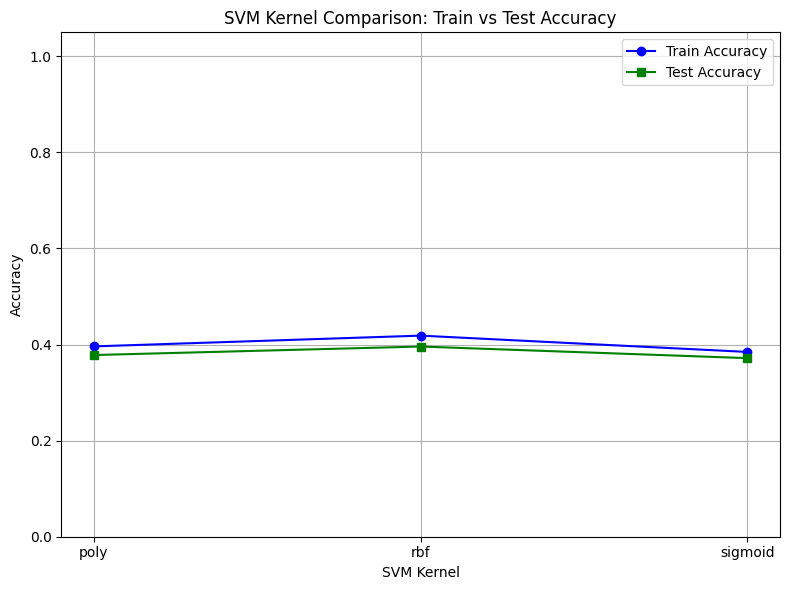

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define X and y
X = df_model.drop('Label', axis=1)
y = df_model['Label']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


kernels = ['poly', 'rbf', 'sigmoid']
train_accuracies = []
test_accuracies = []

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Print classification results
    print(f"Confusion Matrix for {kernel} kernel:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"Classification Report for {kernel} kernel:\n{classification_report(y_test, y_test_pred)}")

# Plotting train vs test accuracy
plt.figure(figsize=(8, 6))
plt.plot(kernels, train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(kernels, test_accuracies, marker='s', label='Test Accuracy', color='green')
plt.title('SVM Kernel Comparison: Train vs Test Accuracy')
plt.xlabel('SVM Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
